In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic student data (replace with real data)
np.random.seed(42)
data = {
    'attendance': np.random.normal(85, 10, 1000),
    'internal1': np.random.normal(75, 12, 1000),
    'internal2': np.random.normal(78, 10, 1000),
    'internal3': np.random.normal(80, 8, 1000),
    'study_hours': np.random.normal(15, 5, 1000),
    'parent_education': np.random.choice(['high school', 'some college', "bachelor's", "master's"], 1000),
    'gender': np.random.choice(['M', 'F'], 1000),
    'final_score': np.random.normal(75, 15, 1000)
}

# Create correlation with final_score
data['final_score'] = (data['attendance'] * 0.3 +
                      data['internal1'] * 0.2 +
                      data['internal2'] * 0.2 +
                      data['internal3'] * 0.2 +
                      data['study_hours'] * 0.1 +
                      np.random.normal(0, 5, 1000))

df = pd.DataFrame(data)
df.head()

,attendance,internal1,internal2,internal3,study_hours,parent_education,gender,final_score
0,89.967142,91.792265,71.248217,64.737540,10.682532,master's,M,73.903320
1,83.617357,86.095604,76.554813,73.116920,14.843983,high school,F,72.395110
2,91.476885,75.715564,70.075801,76.691156,15.090084,master's,M,76.870831
3,100.230299,67.236759,74.920385,95.101501,17.363152,some college,M,77.151140
4,82.658466,83.378680,59.063853,84.452425,8.165708,master's,M,75.875259


In [2]:
# Data preprocessing
# Convert categorical variables
df = pd.get_dummies(df, columns=['gender', 'parent_education'], drop_first=True)

# Feature engineering
df['avg_internal'] = (df['internal1'] + df['internal2'] + df['internal3']) / 3
df = df.drop(['internal1', 'internal2', 'internal3'], axis=1)
df.head()

,attendance,study_hours,final_score,gender_M,parent_education_high school,parent_education_master's,parent_education_some college,avg_internal
0,89.967142,10.682532,73.903320,True,False,True,False,75.926007
1,83.617357,14.843983,72.395110,False,True,False,False,78.589112
2,91.476885,15.090084,76.870831,True,False,True,False,74.160840
3,100.230299,17.363152,77.151140,True,False,False,True,79.086215
4,82.658466,8.165708,75.875259,True,False,True,False,75.631653


<Figure size 1200x800 with 0 Axes>

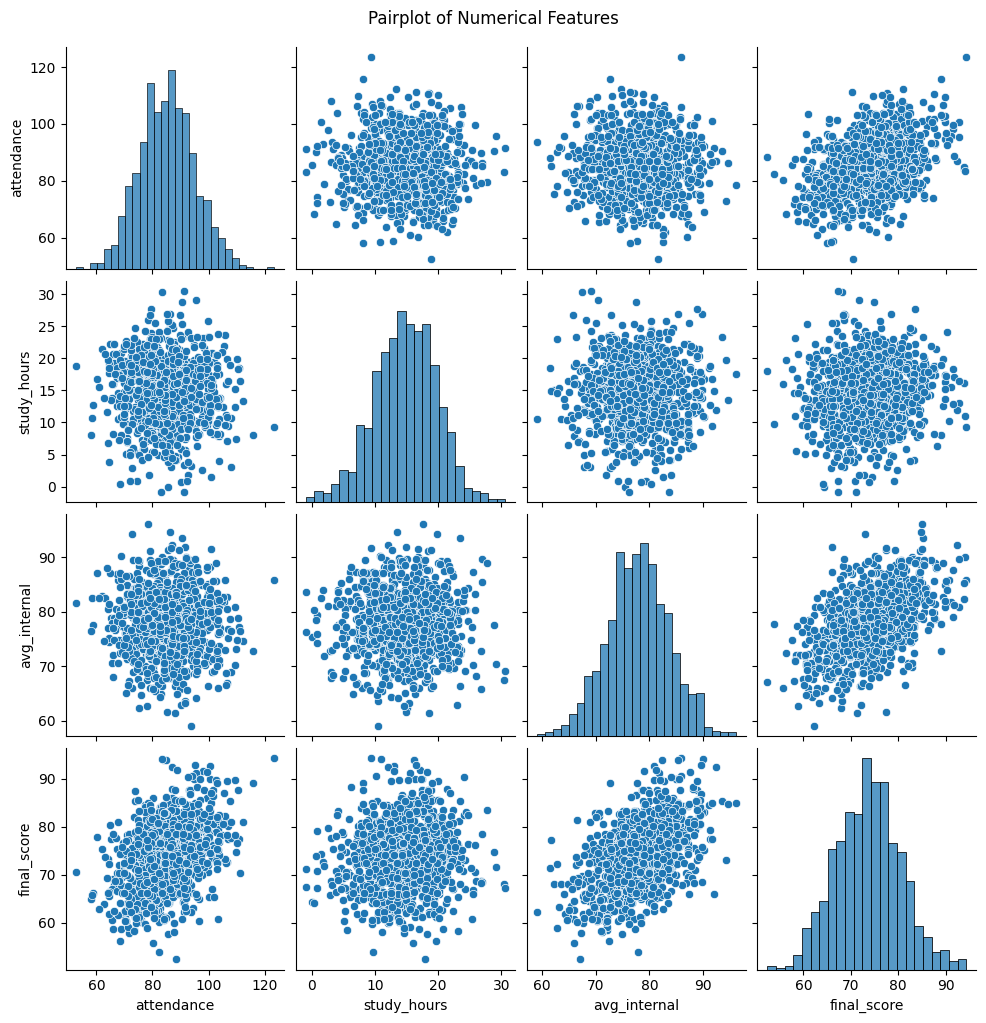

In [3]:
# EDA Visualization
plt.figure(figsize=(12, 8))
sns.pairplot(df[['attendance', 'study_hours', 'avg_internal', 'final_score']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

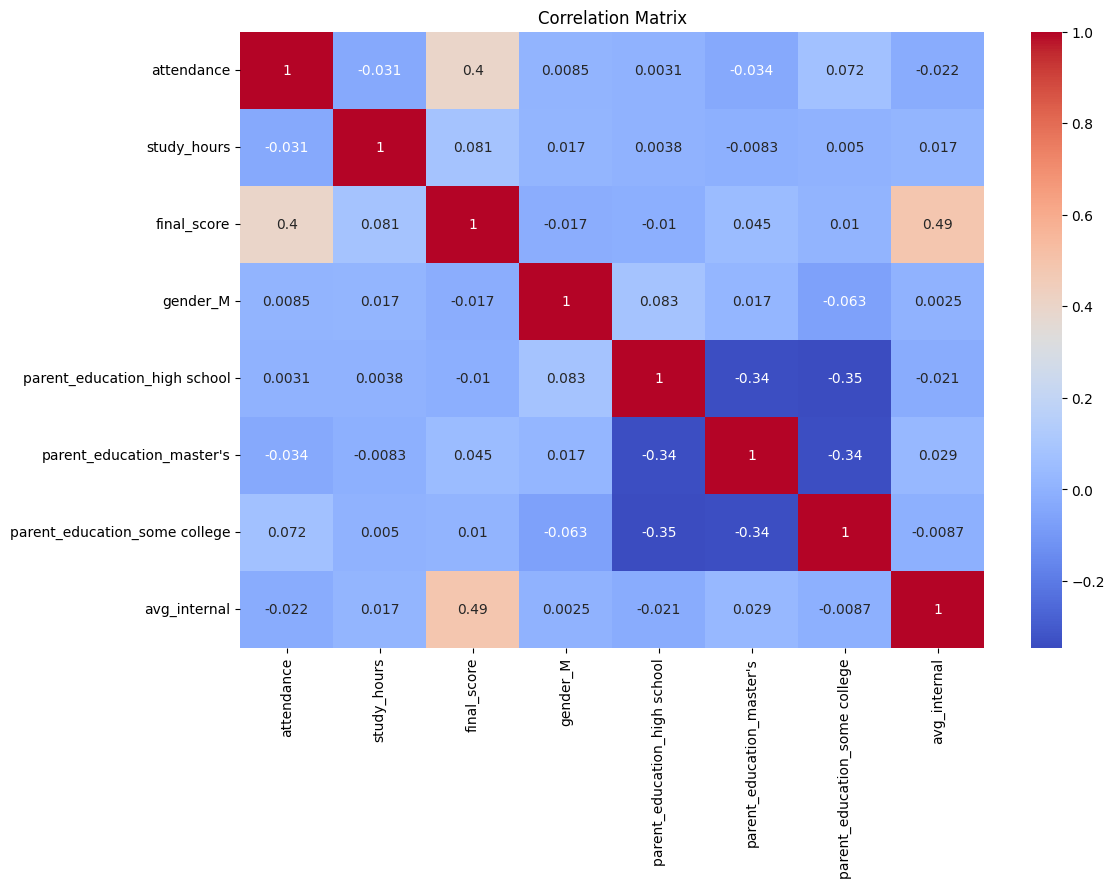

In [5]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Prepare data for modeling
X = df.drop('final_score', axis=1)
y = df['final_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

In [7]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'RMSE': rmse,
        'R2': r2
    }


Model Performance Comparison:
                       RMSE        R2
Linear Regression  5.126995  0.450551
Random Forest      5.631907  0.337001
XGBoost            6.277283  0.176345


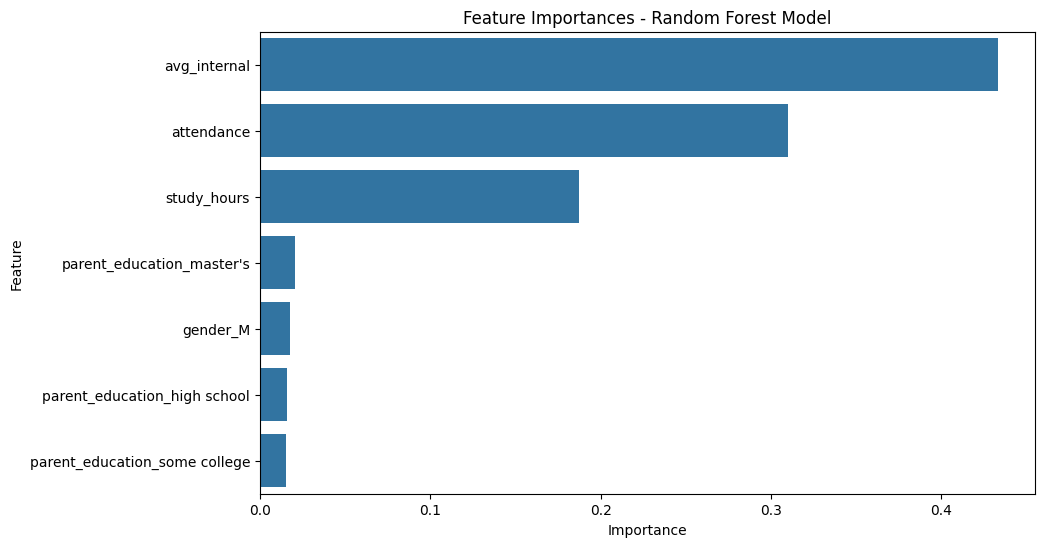

In [8]:
# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

# Feature importance for best model (Random Forest)
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train_scaled, y_train)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances - Random Forest Model')
plt.show()